# Dasari Mohan Krishna

# Machine Learning Internship task

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
# Importing required libraries
import numpy as np  #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt   #plotting package
import matplotlib as mpl
import seaborn as sns   # Visualization
mpl.rcParams['figure.dpi'] = 200 #high res figures
import graphviz #To visualize decision trees
#Next line helps with rendering plots
%matplotlib inline

In [3]:
# Loading the dataset
df = pd.read_csv('taskdata.csv')
df.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


**Checking for zero values in the dataset**

In [4]:
df_zero_mask = df == 0

In [5]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
feature_zero_mask

0       False
1       False
2       False
3       False
4       False
        ...  
4402    False
4403    False
4404    False
4405    False
4406    False
Length: 4407, dtype: bool

In [6]:
sum(feature_zero_mask)

0

**Since there are no zeros present in the dataset, we can continue for data prepossing**

In [7]:
df.shape

(4407, 17)

In [8]:
# To check whether User Id's are unique 
df['user_id'].nunique()

4407

In [9]:
df.describe()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
count,4.407000e+03,4400.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000
mean,4.106655e+09,506.553864,22.335602,7.171576,9.874064,194.130365,16.942615,3.249388,72.119006,0.497844,338.851046,98.922260,16.812003,25.681004,27.622151,0.162009,0.103245
std,6.794948e+09,326.072756,43.591246,19.209092,5.169639,1548.361547,128.268824,5.509869,117.019515,1.199725,831.746150,297.692950,68.045904,55.324218,61.069006,0.517693,0.304313
min,4.100390e+05,111.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.184510e+08,226.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.142857,2.727273,0.000000,0.000000,13.500000,2.500000,4.461538,4.384615,0.000000,0.000000
50%,7.296626e+08,493.000000,2.000000,1.076923,12.000000,0.000000,0.000000,2.000000,45.000000,0.000000,40.000000,40.000000,6.333333,12.266667,12.933333,0.000000,0.000000
75%,7.292936e+09,1005.000000,30.000000,5.666667,14.000000,0.000000,0.000000,4.333333,100.000000,0.000000,327.280000,101.291667,14.250000,28.000000,30.784615,0.153846,0.000000
max,7.356031e+10,1017.000000,354.000000,354.000000,24.000000,43957.172700,3852.727273,156.583333,3357.500000,5.000000,15606.500000,9183.866667,2606.000000,1716.400000,1743.266667,14.636364,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 17 columns):
user_id                  4407 non-null int64
account_id               4400 non-null float64
max_return_days          4407 non-null int64
average_return_days      4407 non-null float64
customer_since_months    4407 non-null int64
total_revenue            4407 non-null float64
average_revenue          4407 non-null float64
avg_vas_count            4407 non-null float64
avg_used_vas_value       4407 non-null float64
business_type            4407 non-null int64
avg_wallet_bonus         4407 non-null float64
avg_active_ads           4407 non-null float64
avg_new_ads              4407 non-null float64
avg_email_replies        4407 non-null float64
avg_call_replies         4407 non-null float64
avg_sms_replies          4407 non-null float64
target                   4407 non-null int64
dtypes: float64(12), int64(5)
memory usage: 585.4 KB


In [11]:
# Checking for the null values in dataset
df.isnull().mean()*100

user_id                  0.000000
account_id               0.158838
max_return_days          0.000000
average_return_days      0.000000
customer_since_months    0.000000
total_revenue            0.000000
average_revenue          0.000000
avg_vas_count            0.000000
avg_used_vas_value       0.000000
business_type            0.000000
avg_wallet_bonus         0.000000
avg_active_ads           0.000000
avg_new_ads              0.000000
avg_email_replies        0.000000
avg_call_replies         0.000000
avg_sms_replies          0.000000
target                   0.000000
dtype: float64

In [12]:
# To fill the gaps in the columns
#Numerical variables
num_var=["account_id"]

#For numerical variables we use 'mean() and median()'
df["account_id"].mean()

506.55386363636364

In [13]:
#For numerical varobles
def impute_num(df,variable):
    return df[variable].fillna(df[variable].mean())

for var in num_var:
    print(var)
    df[var]=impute_num(df,var)

account_id


In [14]:
df.isnull().mean()*100

user_id                  0.0
account_id               0.0
max_return_days          0.0
average_return_days      0.0
customer_since_months    0.0
total_revenue            0.0
average_revenue          0.0
avg_vas_count            0.0
avg_used_vas_value       0.0
business_type            0.0
avg_wallet_bonus         0.0
avg_active_ads           0.0
avg_new_ads              0.0
avg_email_replies        0.0
avg_call_replies         0.0
avg_sms_replies          0.0
target                   0.0
dtype: float64

# Correlation between the attributes

In [15]:
# Finding Coorelation between attributes
c=df.corr()
c

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
user_id,1.000000,0.056688,0.028499,0.026847,-0.181716,-0.033229,-0.016305,-0.101787,-0.113606,0.042143,-0.096286,-0.061322,-0.004062,-0.105138,-0.098300,-0.070980,0.048490
account_id,0.056688,1.000000,0.186014,0.114056,-0.138349,-0.056087,-0.063250,-0.123714,-0.137656,-0.023512,-0.115233,-0.104806,-0.049343,-0.111494,-0.115312,-0.082605,0.121809
max_return_days,0.028499,0.186014,1.000000,0.749094,-0.186734,-0.001811,0.013263,-0.112033,-0.118764,-0.019023,-0.131315,-0.042675,-0.008815,-0.075633,-0.079001,-0.050154,0.275005
average_return_days,0.026847,0.114056,0.749094,1.000000,-0.256605,-0.014424,-0.006545,-0.108025,-0.113959,0.026801,-0.103527,-0.046713,-0.016387,-0.070537,-0.070755,-0.038732,0.165715
customer_since_months,-0.181716,-0.138349,-0.186734,-0.256605,1.000000,0.090540,0.063951,0.321568,0.350931,-0.218603,0.352093,0.138861,0.019360,0.206298,0.206565,0.123171,-0.234972
total_revenue,-0.033229,-0.056087,-0.001811,-0.014424,0.090540,1.000000,0.950358,0.608588,0.642122,-0.017495,0.075943,0.341777,0.130780,0.214070,0.214298,0.213396,-0.032571
average_revenue,-0.016305,-0.063250,0.013263,-0.006545,0.063951,0.950358,1.000000,0.586251,0.612556,-0.001665,0.070069,0.354470,0.132430,0.209710,0.209277,0.214935,-0.025354
avg_vas_count,-0.101787,-0.123714,-0.112033,-0.108025,0.321568,0.608588,0.586251,1.000000,0.962312,-0.119815,0.131268,0.413862,0.191781,0.360756,0.342740,0.240634,-0.117167
avg_used_vas_value,-0.113606,-0.137656,-0.118764,-0.113959,0.350931,0.642122,0.612556,0.962312,1.000000,-0.119799,0.156331,0.407619,0.185732,0.363019,0.347185,0.244277,-0.128469
business_type,0.042143,-0.023512,-0.019023,0.026801,-0.218603,-0.017495,-0.001665,-0.119815,-0.119799,1.000000,-0.107555,-0.076337,-0.005084,-0.050476,-0.054189,0.005367,0.005272


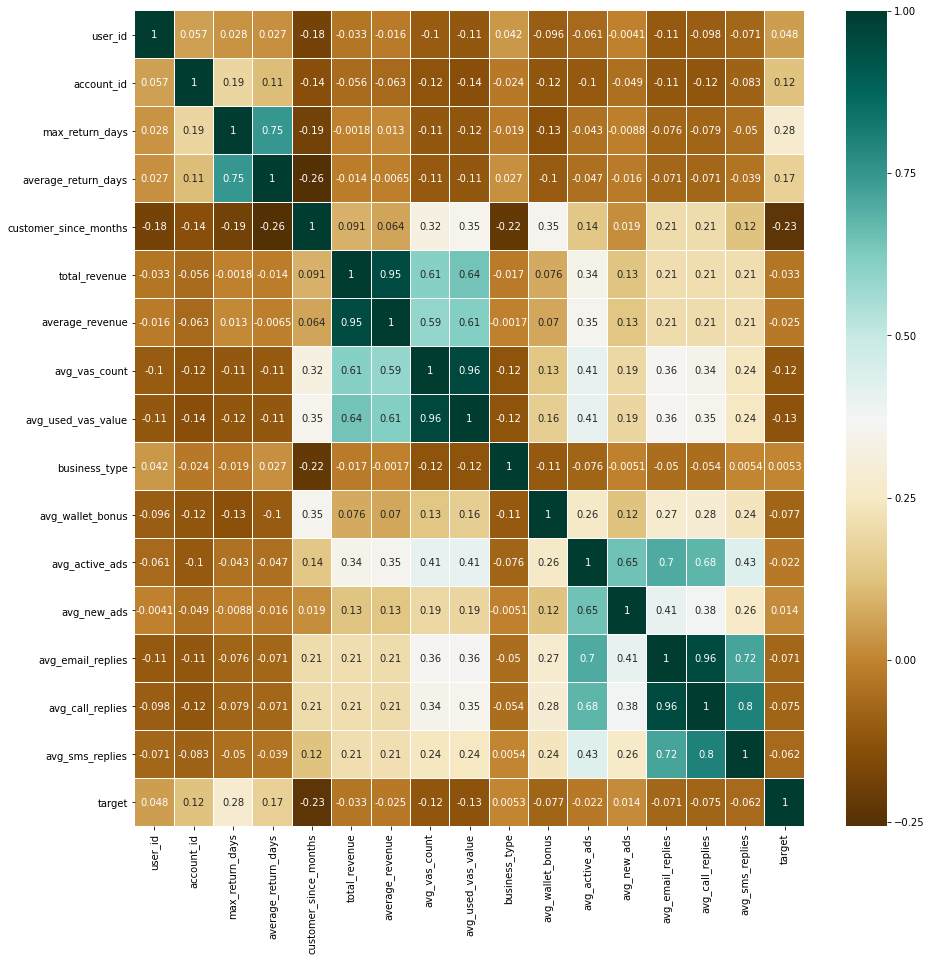

In [16]:
# Drawing Heatmap which can help to visually represents the correlation between the attributes
plt.figure(figsize=(15,15))
sns.heatmap(c, cmap='BrBG', annot=True, linewidths=0.05)

**From the above Heatmap, we can see that max_return_days(Maximum number of days in which user made a re-purchase) with 28 % and average_return_days(Average number of days in which user made a purchase) with 17 % are more correlated with the target variable**

# Training the model

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Assigning X and y(target variable) values 
X = df.drop(['target'],axis=1)
y = df['target']

**Splitting the dataset into train and test data**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Random Forest Classifier

In [20]:
# For Classification model we are using Random Forest Classifier

#Random Forest

from sklearn.ensemble import RandomForestClassifier

#Creating an instant
rf_classifier = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=9, min_samples_split=2, min_samples_leaf=1, 
                            max_features='auto', n_jobs=-1,random_state=0, 
                            verbose=1, warm_start=False)

rf_classifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=1,
                       warm_start=False)

**Fitting the model**

In [21]:
rf_classifier.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=1,
                       warm_start=False)

**Predicting the target variables for both train and test sets**

In [22]:
y_pred_train = rf_classifier.predict(X_train)
y_pred_test = rf_classifier.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.4s finished


**Finding the Performance of the model**

In [23]:
# To Find Performace of the model
from sklearn.metrics import confusion_matrix, accuracy_score

#Confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_train

array([[2764,    0],
       [ 185,  135]], dtype=int64)

In [24]:
cm_test = confusion_matrix(y_test, y_pred_test)
cm_test

array([[1177,   11],
       [ 114,   21]], dtype=int64)

In [25]:
# Accuracy of the model
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_train

0.9400129701686122

In [26]:
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_test

0.9055177626606198

# Grid Search - Cross Validation

In [27]:
from sklearn.model_selection import GridSearchCV

rf_classifier = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=0)
rf_classifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [28]:
#To check different options in the classifier for maximum accuracy
rf_params = {'max_depth':[3, 6, 9, 12, 15],
             'n_estimators':[100, 200, 300, 400, 500]}

rf_params

{'max_depth': [3, 6, 9, 12, 15], 'n_estimators': [100, 200, 300, 400, 500]}

In [29]:
grid_search_rf = GridSearchCV(rf_classifier, rf_params, scoring='accuracy', n_jobs=-1, cv=5)
grid_search_rf

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=500, n_jobs=-1,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_dept

**Fitting the model in Grid Search CV**

In [30]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=500, n_jobs=-1,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_dept

**Listing the results**

In [31]:
impute_df = pd.DataFrame(grid_search_rf.cv_results_)
impute_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.640208,0.066935,0.115929,0.010328,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.896272,0.901135,0.901135,0.896272,0.896104,0.898184,0.002410,21
1,1.294806,0.126686,0.135717,0.024467,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.897893,0.897893,0.899514,0.896272,0.896104,0.897536,0.001250,24
2,1.952003,0.181752,0.377569,0.132586,3,300,"{'max_depth': 3, 'n_estimators': 300}",0.897893,0.897893,0.901135,0.896272,0.896104,0.897860,0.001807,22
3,2.830664,0.140520,0.304614,0.073218,3,400,"{'max_depth': 3, 'n_estimators': 400}",0.896272,0.897893,0.901135,0.897893,0.896104,0.897860,0.001807,22
4,3.515246,0.461303,0.614224,0.182031,3,500,"{'max_depth': 3, 'n_estimators': 500}",0.896272,0.897893,0.897893,0.897893,0.896104,0.897211,0.000837,25
5,1.153493,0.277901,0.216268,0.140403,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.896272,0.901135,0.904376,0.904376,0.902597,0.901751,0.002997,13
6,1.623004,0.229527,0.348187,0.173397,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.896272,0.901135,0.905997,0.902755,0.902597,0.901751,0.003167,13
7,2.710539,0.230663,0.493698,0.117519,6,300,"{'max_depth': 6, 'n_estimators': 300}",0.896272,0.901135,0.907618,0.902755,0.902597,0.902075,0.003634,11
8,3.459879,0.056147,0.447726,0.121773,6,400,"{'max_depth': 6, 'n_estimators': 400}",0.896272,0.901135,0.909238,0.902755,0.904221,0.902724,0.004216,7
9,4.906192,0.128804,0.602231,0.185161,6,500,"{'max_depth': 6, 'n_estimators': 500}",0.896272,0.902755,0.909238,0.902755,0.904221,0.903048,0.004143,6


In [32]:
#Finding best parameters
grid_search_rf.best_params_

{'max_depth': 15, 'n_estimators': 300}

In [33]:
#cross validation - best estimator
cv_rf_classifier = grid_search_rf.best_estimator_
cv_rf_classifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [34]:
# predicting with the best estimator
y_pred_train = cv_rf_classifier.predict(X_train)
y_pred_test = cv_rf_classifier.predict(X_test)

In [35]:
# Accuracy of the trained model
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_train

0.9980544747081712

In [36]:
# Accuracy of the test model
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_test

0.9123204837490552

# XGBoost Classifier

In [37]:
import xgboost as xgb

In [38]:
xgb_classifier = xgb.XGBClassifier(max_depth=10, n_jobs=-1, learning_rate=0.2, n_estimators = 500)
xgb_classifier

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.2, max_delta_step=None, max_depth=10,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [39]:
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

**Prediction with XGB classifier**

In [40]:
y_pred_train = xgb_classifier.predict(X_train)
y_pred_test = xgb_classifier.predict(X_test)

In [41]:
# Accuracy of the trained model
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_train

1.0

In [42]:
# Accuracy of the test model
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_test

0.9168556311413454

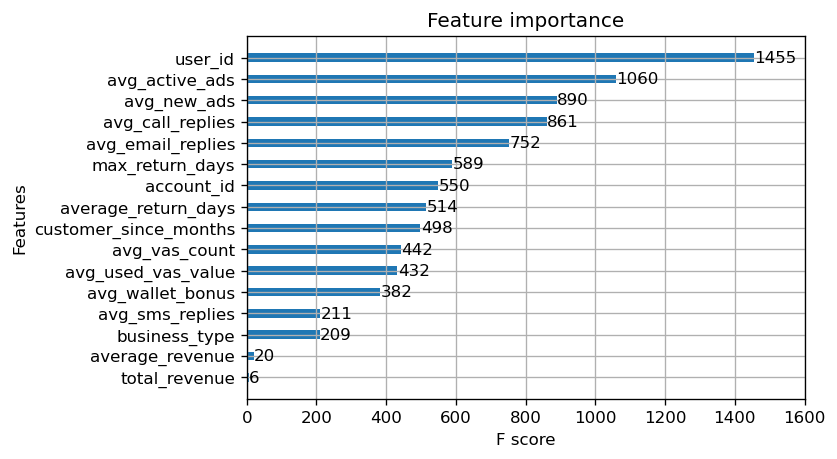

In [43]:
#Plot importance
mpl.rcParams['figure.dpi'] = 120
xgb.plot_importance(xgb_classifier, height=0.4)

**From the above graph, it is clear that the features such as Average no of active ads, Average no of new ads, Average no of call replies and Average no of email replies have more feature importance than the other features**

# Implementing SHAP Model

In [44]:
import shap  # package used to calculate Shap values

In [45]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(cv_rf_classifier) # Here we are using Random Forest classifier with best estimator

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [46]:
# Calculate Shap values
shap_values = explainer.shap_values(y)
shap_values

[array([-0.13172943,  0.0072116 ,  0.01544595, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.13172943, -0.0072116 , -0.01544595, ...,  0.        ,
         0.        ,  0.        ])]

**The first array is the SHAP values for a negative outcome, and the second array is the list of SHAP values for the positive outcome. Typically we pull out SHAP values for positive outcomes (shap_values[1])**

In [47]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], y)

**Feature values causing increased predictions are in red, and their visual size shows the magnitude of the feature's effect. Feature values decreasing the prediction are in blue.**

# Using Kernel Explainer

**shap.KernelExplainer works with all models, though it is slower than other Explainers and it offers an approximation rather than exact Shap values.**

In [48]:
# Using Kernel SHAP to explain the predictions
k_explainer = shap.KernelExplainer(cv_rf_classifier.predict_proba, X_train)

Using 3084 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [49]:
shap.initjs()
shap.force_plot(k_explainer.expected_value[1], shap_values[1], y)

**The results aren't identical because KernelExplainer gives an approximate result. But the results tell the same story.**

**Calculate shap_values for all of X_test rather than a single row, to have more data for plot by using normal SHAP model**

In [50]:
shap_values = explainer.shap_values(X_test)

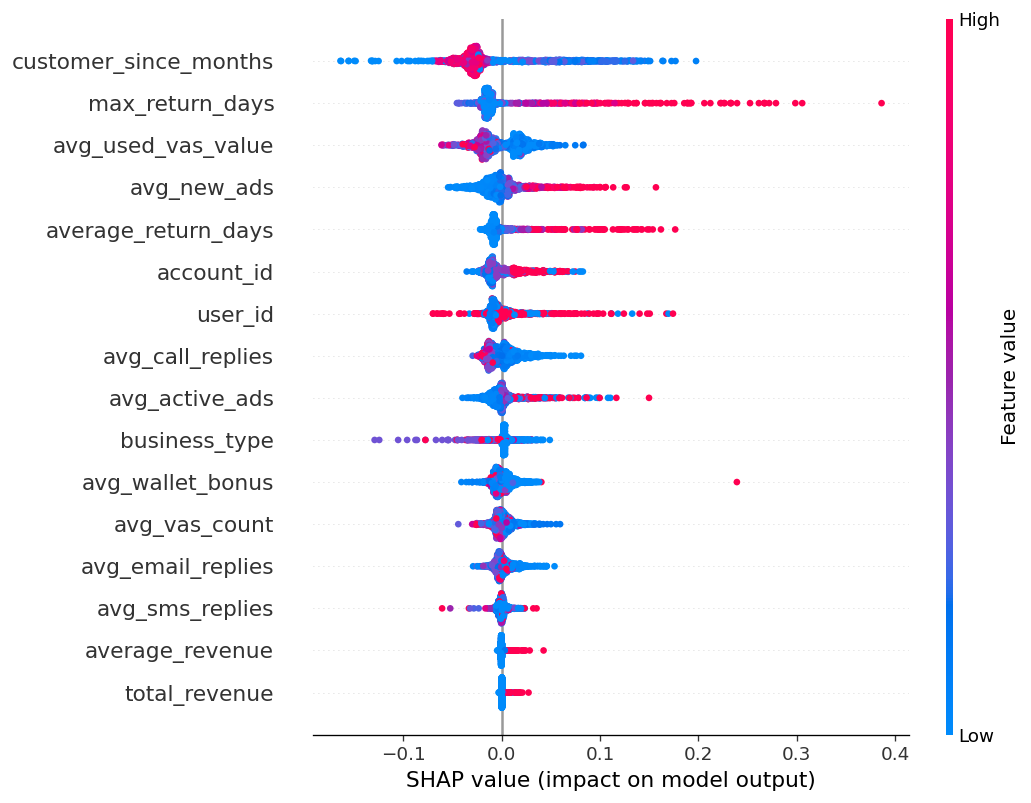

In [51]:
shap.summary_plot(shap_values[1], X_test)